<a href="https://colab.research.google.com/github/pd4ni3l/IncendiosFlorestais/blob/master/Incendio_florestal_final_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#LISTAR ARQUIVOS NA PASTA CORRENTE
from __future__ import print_function
import os,sys
path = '.' 
if len(sys.argv) == 2:
    path = sys.argv[1]
 
files = os.listdir(path)
for name in files:
    print(name)

.config
sample_data


O código abaixo permite a conexão ao Google Drive de quem está executando para carregar arquivos ou gravar arquivos em um Notebook executado no Google Colab.

Altere a linha que carrega o arquivo forestfires.csv para refletir a sua necessidade.

In [21]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from time import process_time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Sobre a base de dados
A base de dados escolhida para o desenvolvimento do trabalho é originada do artigo "A Data Mining Approach to Predict Forest Fires using Meteorological Data" de Paulo Cortez e Aníbal Morais do "Department of Information Systems/R&D Algoritmi Centre, University of Minho, 4800-058 Guimara ̃es, Portugal" acessível no link http://www3.dsi.uminho.pt/pcortez/fires.pdf.


# Links e outras informações:
Base dados: https://archive.ics.uci.edu/ml/datasets/forest+fires 

Abstract: This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data. (http://www3.dsi.uminho.pt/pcortez/forestfires/)

Resumo: Esta é uma tarefa de regressão difícil, onde o objetivo é prever a área queimada de incêndios florestais, na região nordeste de Portugal, usando dados meteorológicos e outros dados. (http://www3.dsi.uminho.pt/pcortez/forestfires/)

Carregando os dados e imprimindo os 10 primeiros registros (lembre-se de alterar o caminho para o local onde está o arquivo csv).

In [23]:
file_name = '/gdrive/My Drive/Colab Notebooks/forestfires.csv'
data = pd.read_csv(file_name, sep=',')

data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


# Descrição dos atributos
X - coordenada espacial do eixo x no mapa do parque de Montesinho: 1 a 9<br>
Y - coordenada espacial do eixo y no mapa do parque de Montesinho: 1 a 9<br>
month - mês do ano: 'jan' a 'dec'<br>
day - dia da semana: 'mon' to 'sun'<br>
FFMC - Índice FFMC do sistema FWI (Canadian Forest Fire Weather Index): 18,7 a 96,20<br>
DMC - Índice DMC do sistema FWI: 1.1 a 291.3<br>
DC - Índice DC do sistema FWI: 7,9 a 860,6<br>
ISI - Índice ISI do sistema FWI: 0.0 a 56.10<br>
temp - temperatura em graus Celsius, 2,2-33,30<br>
RH - umidade relativa em%: 15,0 a 100<br>
wind - velocidade do vento em km / h: 0.40 a 9.40<br>
rain - chuva externa em mm / m2: 0.0 a 6.4<br>
área - a área queimada da floresta (em ha): 0.00 a 1090.84

Imprimindo o formato dos dados (517 linhas e 13 colunas)

In [24]:
data.shape

(517, 13)

#Alterções necessárias
Pra podermos analizar todos os dados é necessário converter os dados que estão como categoria para dados numéricos.
Abaixo estamos demonstrando que a coluna mês (month)  e dia (day) é um campo alfanumérico e teremos que converter para  numérico.

In [25]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [26]:
# Convertendo meses alfanuméricos em numéricos
# Criaremos um dicionário (dic) para fazer esta conversão  
mes = {'jan': 1,'feb': 2, 'mar':3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 
       'oct': 10, 'nov': 11, 'dec': 12} 

data.month = [mes[item] for item in data.month] 
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [27]:
#verificando a alteração dos meses
data['month'].value_counts()

8     184
9     172
3      54
7      32
2      20
6      17
10     15
12      9
4       9
5       2
1       2
11      1
Name: month, dtype: int64

In [28]:
data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [29]:
# Convertendo dias alfanuméricos em numéricos
# criando um dicionário dic  
dia = {'sun': 1, 'mon': 2, 'tue': 3, 'thu': 4, 'wed': 5, 'fri': 6, 'sat': 7} 
#print(data.month)
data.day = [dia[item] for item in data.day] 
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [30]:
#verificando os dias convertidos
data['day'].value_counts()

1    95
6    85
7    84
2    74
3    64
4    61
5    54
Name: day, dtype: int64

Verifique a baixo que agora temos um dataset totalmente numérico podendo ser submetido aos algoritmos para análise.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null int64
day      517 non-null int64
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


No nosso estudo não nos interessamos em saber a área incendiada e sim se houve ou não incêndio.
Para isso iremos transformar a coluna área para incêndio e alterar o valor se area maior que zero como incêndio.

In [0]:
#Transformação da área incendiada para 0 - sem incêndio, 1 - com incêndio
data['incendio'] = data['area'].apply(lambda x: 1 if x > 0.00 else 0.00)


In [33]:
data['incendio'].value_counts()

1.0    270
0.0    247
Name: incendio, dtype: int64

Acima podemos verificar que das 517 ocorrencias coletadas 270 resultaram em incêndio.

In [34]:
# dataset final com dados convertidos
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,incendio
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0
5,8,6,8,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0.0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0.0
8,8,6,9,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0.0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0.0


Verificando a correlação dos dados.

In [35]:
print("Correlação: ")
data.corr(method='pearson')

Correlação: 


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,incendio
X,1.000000,0.539548,-0.065003,0.015282,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385,0.062491
Y,0.539548,1.000000,-0.066292,-0.010088,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873,0.056892
month,-0.065003,-0.066292,1.000000,-0.037397,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496,0.130329
day,0.015282,-0.010088,-0.037397,1.000000,0.076324,0.018082,-0.002360,0.057300,0.037480,-0.077400,0.002562,-0.023082,0.043762,-0.000060
FFMC,-0.021039,-0.046308,0.291477,0.076324,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.073823
DMC,-0.048384,0.007782,0.466645,0.018082,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.062672
DC,-0.085916,-0.101178,0.868698,-0.002360,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.096724
ISI,0.006210,-0.024488,0.186597,0.057300,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.035663
temp,-0.051258,-0.024103,0.368842,0.037480,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.076047
RH,0.085223,0.062221,-0.095280,-0.077400,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.035587


A partir deste ponto será utilizado como base o arquivo fornecido pela Professora Letícia (pca_mnist_mlp_svm_NEW.py) com as necessárias alterações. 


In [0]:
# PCA 
#normalização
#transforma uma lista em um vetor
X_ = np.array(data)
m = np.mean(X_)
s = np.std(X_,ddof=1)
X = (X_ - m)/s

In [54]:
#Calcular PCA de todo o conjunto de entrada
pca = PCA(n_components=13)
X_projected = pca.fit_transform(X)

print('Shape dados brutos: ' + str(X.shape))
print('Shape dados PCA: ' + str(X_projected.shape))

Shape dados brutos: (517, 14)
Shape dados PCA: (517, 13)


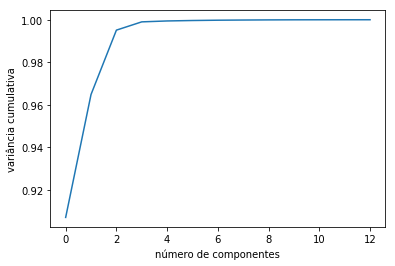

In [55]:
#Verificando o número de componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('variância cumulativa')
plt.show()

In [0]:
# Set a KMeans clustering
kmeans = KMeans(n_clusters=5)
# Compute cluster centers and predict cluster indices
y = kmeans.fit_predict(X_projected)

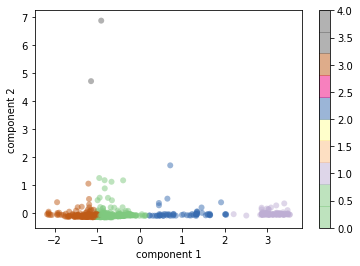

In [57]:
# plot em 2D com 2 componentes
plt.scatter(X_projected[:, 0], X_projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

In [0]:
# Separa conjunto de train e val dos dados brutos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [0]:
# Separa conjunto de train e val da PCA
projected_train, projected_val, y_train, y_val = train_test_split(X_projected, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [0]:
# Definir arquitetura MLP
mlp = MLPClassifier(hidden_layer_sizes=(200,200), activation='relu', max_iter=1000, alpha=1e-4,
                     solver='lbfgs', verbose=10, tol=1e-3, random_state=1, learning_rate_init=.01)

In [44]:
# Aqui fazer um treinamento e uma validacao da MLP com dados brutos
start = process_time()
mlp.fit(X_train, y_train)
end = process_time()
time_mlp = end - start
print('Tempo de treinamento_mlp_dados_brutos: ' + str(time_mlp))
print('Erro no final do treinamento_mlp_dados_brutos: %f' % mlp.loss_)

Tempo de treinamento_mlp_dados_brutos: 10.0138463
Erro no final do treinamento_mlp_dados_brutos: 0.003865


In [45]:
# Métricas da validação MLP com dados brutos
preds_val = mlp.predict(X_val)
#print(preds_val)
#print(y_val)

correct_outputs_val = y_val
n_acertos_val = 0
for u in range(0, len(correct_outputs_val)):
   if preds_val[u] == correct_outputs_val[u]:
       n_acertos_val += 1
print('Número de acertos_val_mlp com dados brutos: ' + str((n_acertos_val*100)/len(correct_outputs_val)))
print(confusion_matrix(y_val,preds_val))
print(classification_report(y_val,preds_val))

Número de acertos_val_mlp com dados brutos: 98.71794871794872
[[34  0  0  0  0  1  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0 17  1]
 [ 0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         7
           5       0.96      1.00      0.98        26
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00         9
           8       1.00      0.94      0.97        18
           9       0.67      1.00      0.80         2

   micro av

In [46]:
# Aqui fazer um treinamento e uma validacao da MLP com PCA
start = process_time()
mlp.fit(projected_train, y_train)
end = process_time()
time_mlp = end - start
print('Tempo de treinamento_mlp_pca: ' + str(time_mlp))
print("Erro no final do treinamento_mlp_pca: %f" % mlp.loss_)


Tempo de treinamento_mlp_pca: 1.8829473510000003
Erro no final do treinamento_mlp_pca: 0.000443


In [47]:
# Métricas da validação MLP com PCA
preds_val = mlp.predict(projected_val)

correct_outputs_val = y_val
n_acertos_val = 0
for u in range(0, len(correct_outputs_val)):
   if preds_val[u] == correct_outputs_val[u]:
       n_acertos_val += 1
print('Número de acertos_val_mlp com PCA: ' + str((n_acertos_val*100)/len(correct_outputs_val)))
print(confusion_matrix(y_val,preds_val))
print(classification_report(y_val,preds_val))


Número de acertos_val_mlp com PCA: 98.71794871794872
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  1]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  1  0 17  0]
 [ 0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00         1
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        26
           6       0.95      1.00      0.98        21
           7       1.00      1.00      1.00         9
           8       1.00      0.94      0.97        18
           9       0.67      1.00      0.80         2

   micro avg       0

In [0]:
## definir arquitetura da SVM
svm = svm.SVC(kernel='rbf',C =1, gamma='auto')

In [49]:
# Aqui fazer um treinamento e uma validacao da SVM com dados brutos
start = process_time()
svm.fit(X_train, y_train)
end = process_time()
time_svm = end - start
print('Tempo de treinamento_svm_dados_brutos: ' + str(time_svm))

Tempo de treinamento_svm_dados_brutos: 0.021624557999999183


In [50]:
# Métricas da validação SVM com dados brutos
preds_val_svm= svm.predict(X_val)

correct_outputs_val_svm = y_val
n_acertos_val_svm = 0
for u in range(0, len(correct_outputs_val_svm)):
   if preds_val_svm[u] == correct_outputs_val_svm[u]:
            n_acertos_val_svm += 1
print('Number of acertos_val_svm_dados brutos: ' + str((n_acertos_val_svm*100)/len(correct_outputs_val_svm)))
print(confusion_matrix(y_val,preds_val_svm))

Number of acertos_val_svm_dados brutos: 88.46153846153847
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  1  0  0  0]
 [ 0  0  0  0  5  0  0  0  2  0]
 [ 4  0  0  0  0 22  0  0  0  0]
 [ 5  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0]
 [ 3  0  0  0  0  0  1  0 14  0]
 [ 1  0  0  0  0  0  1  0  0  0]]


In [51]:
# Aqui fazer um treinamento e uma validacao da svm com PCA
start = process_time()
svm.fit(projected_train, y_train)
end = process_time()
time_svm = end - start
print('Tempo de treinamento_svm_pca: ' + str(time_svm))

Tempo de treinamento_svm_pca: 0.017152478999999943


In [52]:
# Métricas da validação SVM com PCA
preds_val_svm= svm.predict(projected_val)

correct_outputs_val_svm = y_val
n_acertos_val_svm = 0
for u in range(0, len(correct_outputs_val_svm)):
   if preds_val_svm[u] == correct_outputs_val_svm[u]:
            n_acertos_val_svm += 1
print('Número de acertos_val_svm PCA: ' + str((n_acertos_val_svm*100)/len(correct_outputs_val_svm)))
print(confusion_matrix(y_val,preds_val_svm))


Número de acertos_val_svm PCA: 88.46153846153847
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  1  0  0  0]
 [ 0  0  0  0  5  0  0  0  2  0]
 [ 4  0  0  0  0 22  0  0  0  0]
 [ 5  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0]
 [ 3  0  0  0  0  0  1  0 14  0]
 [ 1  0  0  0  0  0  1  0  0  0]]


In [53]:
## testar um único exemplo
exemplo_=projected_val[1,]
exemplo = exemplo_.reshape((1, 13))
pred_svm = svm.predict(exemplo)
pred_mlp = mlp.predict(exemplo)

ValueError: ignored

In [0]:
print('Exemplo: ', exemplo)
print('Predict SVM:', pred_svm)
print('Predict MLP', pred_mlp)